In [1]:
import pandas as pd
dataset=pd.read_csv("50_Startups.csv")
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


In [2]:
independent=dataset[["R&D Spend","Administration","Administration","State_Florida","State_Florida"]]

In [3]:
dependent=dataset[["Profit"]]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="absolute_error",splitter="random")
regressor=regressor.fit(X_train,Y_train)

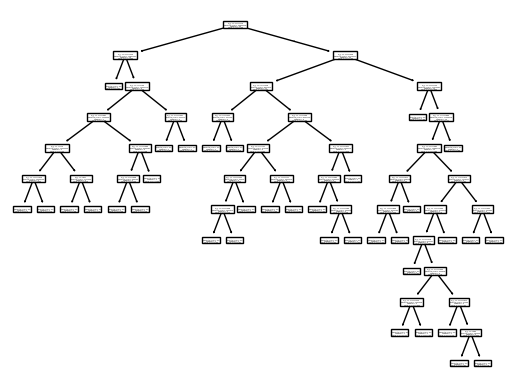

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [36]:
Y_pred=regressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred)

In [38]:
r_score

0.8733162994764663

In [39]:
import pickle
fileName="Finalized_DecisionTree.sav"
pickle.dump(regressor,open(fileName,'wb'))

In [40]:
loaded_model=pickle.load(open("Finalized_DecisionTree.sav",'rb'))
result=loaded_model.predict([[100000,100000,130000,0,0]])
result

C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([129917.04])